In [1]:
# Write your impotrs here

# Data Science Project Architecture
## Getting a feel of an end-to-end data science solution

In this lab, you'll see how all the pieces of data science: data analysis, code, tooling, experiments, come together to create a complete project. You'll perform a smaller-scale demonstration of a data science project lifecycle. Of course, you have to keep in mind that "real-life" data science is highly iterative. You might be working on the same task(s) for weeks or months - this lab is not able to show that.

You'll be working with the asthma dataset located [here](https://www.kaggle.com/datasets/rabieelkharoua/asthma-disease-dataset). As always, it's preloaded for you in the `data/` directory. **Your main goal is to predict what factors lead to positive diagnosis.**

This time, I suggest you do your research into separate notebooks, not inside this one. Use one or several, as you see fit; there are no guidelines as to how many notebooks you should have, or how long (or short) they have to be.

### Problem 1. Project structure (1 point)
Create the necessary directories and structure that you'll use to put your work in. I am providing a suggestion, but you don't have to follow it.
`data/` for... data :D
`notebooks/` for your research. Feel free to move this one inside.
`src/` for Python code (which you'll need to create towards the end of the lab)
`test/` (or `tests/`) for unit tests

You may add any other structure you like. For inspiration, you can see how popular libraries handle their file structure.

Create a GitHub repo (or any other Git-based source control, but I **highly** suggest GitHub) containing your initial project structure. Don't forget to commit relatively often so you have a way to track what you've done so far and go back if something goes awry.

```
Project Structure:
├── data/         # Contains raw datasets and any cleaned or preprocessed versions
├── notebooks/    # Jupyter Notebooks used for data exploration, analysis, and modeling
├── src/          # Python scripts for data processing, feature engineering, and model training
└── tests/        # Unit tests to ensure code reliability and correctness
```

# Asthma Prediction Project

This project is focused on building a machine learning solution to predict whether a person is likely to be diagnosed with asthma, based on various lifestyle, genetic, and medical factors.

## Objective

To analyze the asthma dataset and build a predictive model that identifies key factors contributing to a positive asthma diagnosis.

---

## Project Structure

This is the proposed directory structure for the asthma prediction project:

### Folder Descriptions

- **`data/`** – Store raw input files and any cleaned or transformed versions.
- **`notebooks/`** – Contains Jupyter notebooks for analysis, exploration, and modeling.
- **`src/`** – Python scripts and modules used for the pipeline, such as preprocessing and model training.
- **`tests/`** – Unit tests for validating code functionality and correctness.

---

## Tools and Technologies

- Python (Pandas, NumPy, Scikit-learn, etc.)
- Jupyter Notebook
- Git for version control
- GitHub for code repository
- (Optional) Pytest for unit testing

---

## Getting Started

1. Clone the repository:

```bash
git clone https://github.com/Atanas9205/asthma-diagnosis-project.git
cd asthma-diagnosis-project

### Problem 2. Data Exploration (1 point)
In an appropriate notebook, load the data. Ensure its validity and start your EDA. Feel free to create any visualizations, tables, filters, etc. you see fit.

In [2]:
# Import essential libraries for data analysis and visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set visualization style
sns.set(style='whitegrid')

# Enable inline plotting in Jupyter notebooks
%matplotlib inline

In [3]:
# Load the dataset
df = pd.read_csv("data/asthma_disease_data.csv") # Update filename if different

# Preview the first few rows
df.head()

,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,PhysicalActivity,DietQuality,SleepQuality,...,LungFunctionFEV1,LungFunctionFVC,Wheezing,ShortnessOfBreath,ChestTightness,Coughing,NighttimeSymptoms,ExerciseInduced,Diagnosis,DoctorInCharge
0,5034,63,0,1,0,15.848744,0,0.894448,5.488696,8.701003,...,1.369051,4.941206,0,0,1,0,0,1,0,Dr_Confid
1,5035,26,1,2,2,22.757042,0,5.897329,6.341014,5.153966,...,2.197767,1.702393,1,0,0,1,1,1,0,Dr_Confid
2,5036,57,0,2,1,18.395396,0,6.739367,9.196237,6.840647,...,1.698011,5.022553,1,1,1,0,1,1,0,Dr_Confid
3,5037,40,1,2,1,38.515278,0,1.404503,5.826532,4.253036,...,3.032037,2.300159,1,0,1,1,1,0,0,Dr_Confid
4,5038,61,0,0,3,19.283802,0,4.604493,3.127048,9.625799,...,3.470589,3.067944,1,1,1,0,0,1,0,Dr_Confid


In [4]:
# Display information about the dataset structure and data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2392 entries, 0 to 2391
Data columns (total 29 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   PatientID               2392 non-null   int64  
 1   Age                     2392 non-null   int64  
 2   Gender                  2392 non-null   int64  
 3   Ethnicity               2392 non-null   int64  
 4   EducationLevel          2392 non-null   int64  
 5   BMI                     2392 non-null   float64
 6   Smoking                 2392 non-null   int64  
 7   PhysicalActivity        2392 non-null   float64
 8   DietQuality             2392 non-null   float64
 9   SleepQuality            2392 non-null   float64
 10  PollutionExposure       2392 non-null   float64
 11  PollenExposure          2392 non-null   float64
 12  DustExposure            2392 non-null   float64
 13  PetAllergy              2392 non-null   int64  
 14  FamilyHistoryAsthma     2392 non-null   

In [5]:
# Check for missing values in each column
df.isnull().sum()

PatientID                 0
Age                       0
Gender                    0
Ethnicity                 0
EducationLevel            0
BMI                       0
Smoking                   0
PhysicalActivity          0
DietQuality               0
SleepQuality              0
PollutionExposure         0
PollenExposure            0
DustExposure              0
PetAllergy                0
FamilyHistoryAsthma       0
HistoryOfAllergies        0
Eczema                    0
HayFever                  0
GastroesophagealReflux    0
LungFunctionFEV1          0
LungFunctionFVC           0
Wheezing                  0
ShortnessOfBreath         0
ChestTightness            0
Coughing                  0
NighttimeSymptoms         0
ExerciseInduced           0
Diagnosis                 0
DoctorInCharge            0
dtype: int64

In [6]:
# Generate basic descriptive statistics for numeric columns
df.describe()

,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,PhysicalActivity,DietQuality,SleepQuality,...,GastroesophagealReflux,LungFunctionFEV1,LungFunctionFVC,Wheezing,ShortnessOfBreath,ChestTightness,Coughing,NighttimeSymptoms,ExerciseInduced,Diagnosis
count,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,...,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000,2392.000000
mean,6229.500000,42.137960,0.493311,0.669732,1.307274,27.244877,0.141722,5.051786,5.022867,7.019012,...,0.158027,2.548564,3.741270,0.596154,0.500418,0.503344,0.503344,0.602425,0.604933,0.051839
std,690.655244,21.606655,0.500060,0.986120,0.898242,7.201628,0.348838,2.903574,2.909980,1.732475,...,0.364842,0.861809,1.303689,0.490770,0.500104,0.500093,0.500093,0.489499,0.488967,0.221749
min,5034.000000,5.000000,0.000000,0.000000,0.000000,15.031803,0.000000,0.001740,0.003031,4.001437,...,0.000000,1.000459,1.500045,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5631.750000,23.000000,0.000000,0.000000,1.000000,20.968313,0.000000,2.578333,2.432043,5.498500,...,0.000000,1.824113,2.607489,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,6229.500000,42.000000,0.000000,0.000000,1.000000,27.052202,0.000000,5.016881,5.115383,6.975839,...,0.000000,2.553244,3.734982,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
75%,6827.250000,61.000000,1.000000,1.000000,2.000000,33.555903,0.000000,7.540234,7.544216,8.526950,...,0.000000,3.292897,4.864121,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
max,7425.000000,79.000000,1.000000,3.000000,3.000000,39.985611,1.000000,9.995809,9.999904,9.996235,...,1.000000,3.999719,5.999421,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


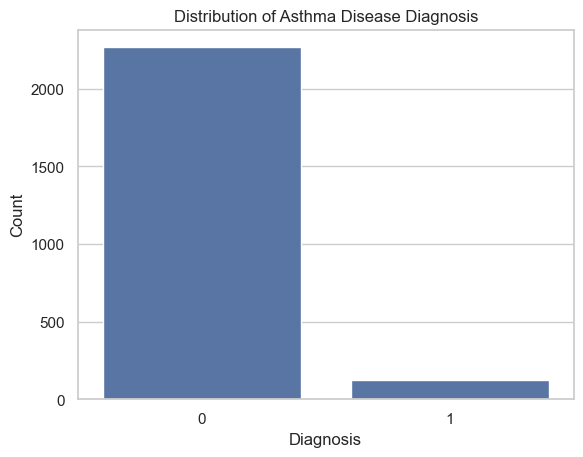

In [7]:
# Visualize the distribution of the target variable
sns.countplot(data=df, x='Diagnosis')
plt.title("Distribution of Asthma Disease Diagnosis")
plt.xlabel("Diagnosis")
plt.ylabel("Count")
plt.show()

<div style="background-color:#f0f4f8; border:1px solid #ccc; padding:15px; border-radius:6px; text-align:justify; font-size:15px; line-height:1.6">

<b>Diagnosis Distribution Analysis</b><br><br>

The bar chart above shows the distribution of the target variable <code>Diagnosis</code>.<br><br>

<ul>
  <li><code>0</code> represents patients without asthma.</li>
  <li><code>1</code> represents patients diagnosed with asthma.</li>
</ul>

The chart reveals a clear class imbalance — the majority of patients do not have asthma.<br><br>

This imbalance should be taken into consideration during model training, as it may lead to biased predictions. Possible solutions include:

<ul>
  <li>Resampling techniques such as undersampling or oversampling</li>
  <li>Using performance metrics like precision, recall, or F1-score instead of accuracy</li>
  <li>Choosing algorithms that handle imbalanced datasets effectively</li>
</ul>

</div>

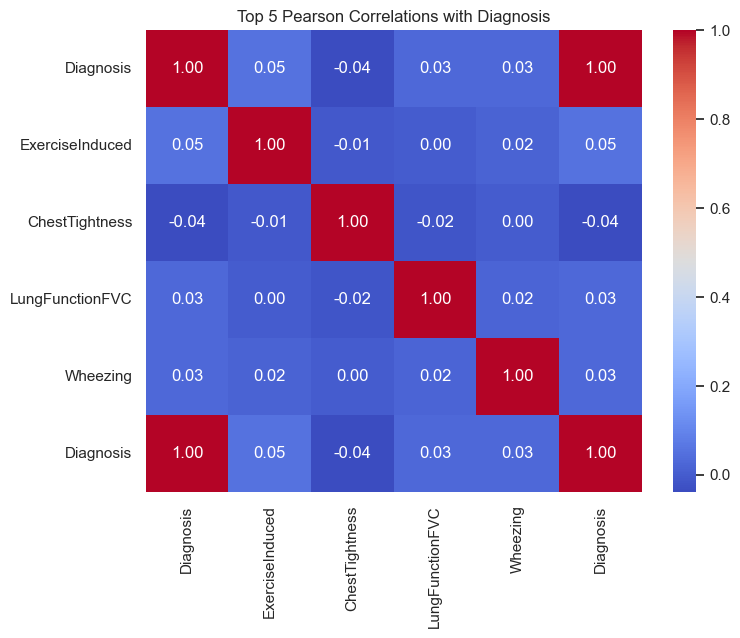

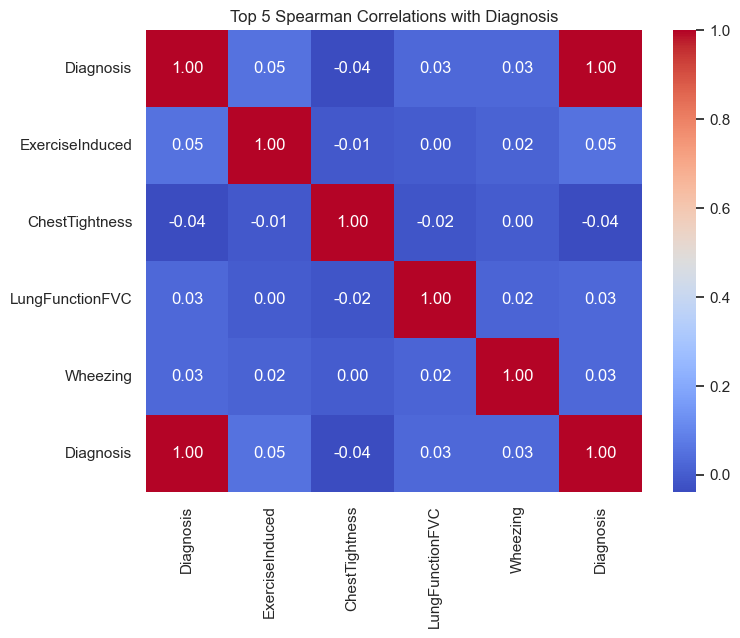

In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Compute both Pearson and Spearman correlation matrices
pearson_corr = df.corr(numeric_only=True, method='pearson')
spearman_corr = df.corr(numeric_only=True, method='spearman')

# Step 2: Remove 'PatientID' from consideration
pearson_target_corr = pearson_corr['Diagnosis'].drop('PatientID').abs()
spearman_target_corr = spearman_corr['Diagnosis'].drop('PatientID').abs()

# Step 3: Select top 5 features most correlated with 'Diagnosis'
top_5_pearson_features = pearson_target_corr.sort_values(ascending=False).head(5).index
top_5_spearman_features = spearman_target_corr.sort_values(ascending=False).head(5).index

# Step 4: Add 'Diagnosis' column to the lists
top_5_pearson_features = top_5_pearson_features.insert(len(top_5_pearson_features), 'Diagnosis')
top_5_spearman_features = top_5_spearman_features.insert(len(top_5_spearman_features), 'Diagnosis')

# Step 5: Filter correlation matrices
filtered_pearson = df[top_5_pearson_features].corr(method='pearson')
filtered_spearman = df[top_5_spearman_features].corr(method='spearman')

# Step 6: Plot Pearson heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(filtered_pearson, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Top 5 Pearson Correlations with Diagnosis')
plt.show()

# Step 7: Plot Spearman heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(filtered_spearman, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Top 5 Spearman Correlations with Diagnosis')
plt.show()

<div style="background-color:#f2f2f2; padding:15px; border-radius:8px; border:1px solid #ddd; text-align:justify; font-size:15px">

### Correlation Analysis of Diagnosis Feature

In the visualizations above, we examine the top 5 features most correlated with the `Diagnosis` variable using two different correlation methods:

- **Spearman correlation**: measures monotonic relationships, capturing both linear and non-linear trends.  
- **Pearson correlation**: measures only linear relationships between features.


#### Key Observations

- Both correlation methods highlight similar features: `ExerciseInduced`, `ChestTightness`, `LungFunctionFVC`, and `Wheezing`.
- The correlation values are quite low (all under 0.1), indicating weak associations with the target variable.
- Spearman correlation may reveal subtle, non-linear relationships that are not visible with Pearson correlation.


#### Why Use Both?

Using both methods provides a broader perspective on how features relate to the target:

- **Pearson** is useful when preparing data for models that assume linearity.
- **Spearman** is beneficial when non-linear or rank-based relationships may still influence predictions.

This analysis supports the feature selection process and helps understand which variables might contribute most effectively to model performance.

</div>

### Problem 3. Data cleaning and preprocessing (1 point)
This should be self-explanatory. In an appropriate notebook (probably different than your previous one), explore different ways to clean and preprocess the dataset.

This is still part of your research. That is, don't be afraid to _try out different approaches to the same problem_. E.g., if you have a lot of missing values, you may not know right away how to handle them. Experimenting with several approaches will give you a better indication what works well for your data and goals.

In [9]:
# Import basic libraries
import pandas as pd
import numpy as np

# Load the dataset
df = pd.read_csv("data/asthma_disease_data.csv")

# 1. Inspect missing values
missing_values = df.isnull().sum()
missing_ratio = df.isnull().mean()

# Display summary of missing values
missing_info = pd.DataFrame({
    'Missing Count': missing_values,
    'Missing Ratio': missing_ratio
})

# Print only columns with missing values, sorted by ratio
print(missing_info[missing_info['Missing Count'] > 0].sort_values(by='Missing Ratio', ascending=False))

# 2. Drop columns with too many missing values (e.g., more than 40%)
threshold = 0.4
df_cleaned = df.loc[:, df.isnull().mean() < threshold]

# 3. Fill remaining missing values

# Separate numeric and categorical columns
numeric_cols = df_cleaned.select_dtypes(include=np.number).columns
categorical_cols = df_cleaned.select_dtypes(include='object').columns

# Fill numeric columns with median
df_cleaned[numeric_cols] = df_cleaned[numeric_cols].fillna(df_cleaned[numeric_cols].median())

# Fill categorical columns with mode (most frequent value)
df_cleaned[categorical_cols] = df_cleaned[categorical_cols].fillna(df_cleaned[categorical_cols].mode().iloc[0])

# 4. Encode categorical variables (One-Hot Encoding)
df_encoded = pd.get_dummies(df_cleaned, drop_first=True)

# 5. Normalize numeric features 
from sklearn.preprocessing import StandardScaler

# Re-detect numeric columns after encoding
final_numeric_cols = df_encoded.select_dtypes(include=np.number).columns

# Apply normalization only on numeric features
scaler = StandardScaler()
df_encoded[final_numeric_cols] = scaler.fit_transform(df_encoded[final_numeric_cols])
print(df_encoded.shape)
print(df_encoded.head())

Empty DataFrame
Columns: [Missing Count, Missing Ratio]
Index: []
(2392, 28)
   PatientID       Age    Gender  Ethnicity  EducationLevel       BMI  \
0  -1.731327  0.965740 -0.986710   0.334986       -1.455673 -1.582769   
1  -1.729879 -0.747054  1.013469   1.349273        0.771363 -0.623300   
2  -1.728430  0.687989 -0.986710   1.349273       -0.342155 -1.229074   
3  -1.726982 -0.098970  1.013469   1.349273       -0.342155  1.565307   
4  -1.725534  0.873156 -0.986710  -0.679301        1.884880 -1.105686   

    Smoking  PhysicalActivity  DietQuality  SleepQuality  ...  \
0 -0.406355         -1.432099     0.160113      0.971063  ...   
1 -0.406355          0.291269     0.453069     -1.076746  ...   
2 -0.406355          0.581330     1.434458     -0.102976  ...   
3 -0.406355         -1.256398     0.276233     -1.596880  ...   
4 -0.406355         -0.154081    -0.651625      1.504976  ...   

   GastroesophagealReflux  LungFunctionFEV1  LungFunctionFVC  Wheezing  \
0               -0.

In [10]:
print("Shape:", df_encoded.shape)
print("Missing values:", df_encoded.isnull().sum().sum())
print("All numeric:", all([np.issubdtype(dtype, np.number) for dtype in df_encoded.dtypes]))

Shape: (2392, 28)
Missing values: 0
All numeric: True


<div style="border:2px solid #4CAF50; border-radius:10px; padding:15px; background-color:#f4fff4; font-family:sans-serif; line-height:1.6; text-align:justify;">

Your dataset has been successfully cleaned and transformed:

<ul>
<li><b>All missing values</b> were handled properly — either dropped or filled using suitable strategies.</li>
<li><b>Numerical features</b> were filled using the <i>median</i> to avoid skewness.</li>
<li><b>Categorical features</b> were filled using the <i>mode</i> (most frequent category).</li>
<li>All categorical variables were <b>encoded with one-hot encoding</b> (drop_first=True).</li>
<li><b>Normalization</b> was applied only to numerical columns after encoding.</li>
</ul>

Final checks confirm:
<ul>
<li>Shape: <code>(2392, 28)</code> — balanced dimensions.</li>
<li>Missing values: <code>0</code> — no null entries remain.</li>
<li>All numeric: <code>True</code> — dataset ready for ML algorithms.</li>
</ul>

This preprocessing makes your data well-prepared for both classical machine learning models (like logistic regression, decision trees) and algorithms that are sensitive to feature scaling (like SVM or KNN).

</div>

### Problem 4. Exploratory data analysis (1 point)
This step may, or may not, happen in unison with the previous one. Your goal is to understand the data distributions, relationships, useful features, maybe create visualizations and inform your data cleaning process.

          PatientID           Age        Gender     Ethnicity  EducationLevel  \
count  2.392000e+03  2.392000e+03  2.392000e+03  2.392000e+03    2.392000e+03   
mean  -9.505588e-17  1.396133e-16 -8.317390e-17 -7.129191e-17    5.940993e-18   
std    1.000209e+00  1.000209e+00  1.000209e+00  1.000209e+00    1.000209e+00   
min   -1.731327e+00 -1.719180e+00 -9.867104e-01 -6.793009e-01   -1.455673e+00   
25%   -8.656634e-01 -8.859290e-01 -9.867104e-01 -6.793009e-01   -3.421554e-01   
50%    0.000000e+00 -6.386399e-03 -9.867104e-01 -6.793009e-01   -3.421554e-01   
75%    8.656634e-01  8.731562e-01  1.013469e+00  3.349861e-01    7.713625e-01   
max    1.731327e+00  1.706407e+00  1.013469e+00  2.363560e+00    1.884880e+00   

                BMI       Smoking  PhysicalActivity   DietQuality  \
count  2.392000e+03  2.392000e+03      2.392000e+03  2.392000e+03   
mean   2.172175e-16  1.143641e-16      7.723291e-17 -9.208539e-17   
std    1.000209e+00  1.000209e+00      1.000209e+00  1.000209e+

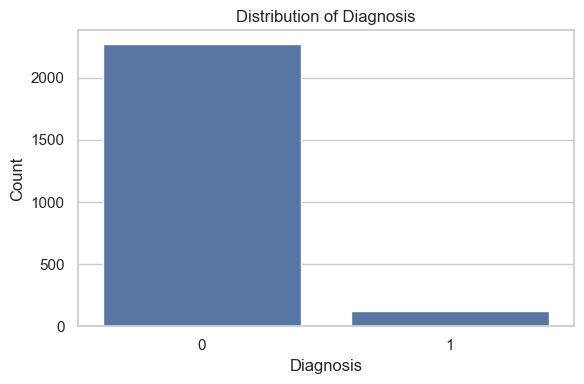

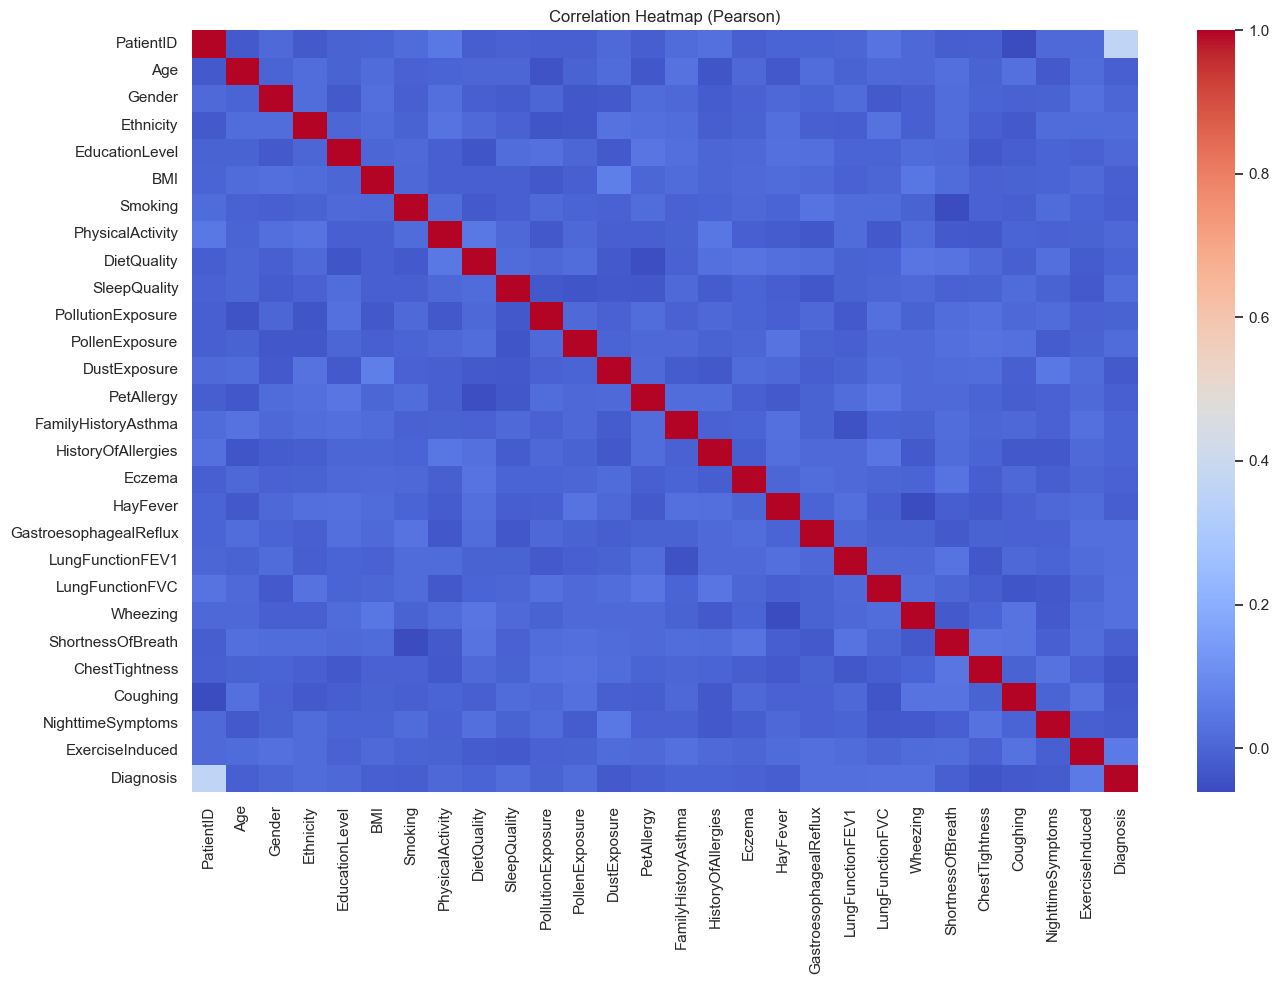

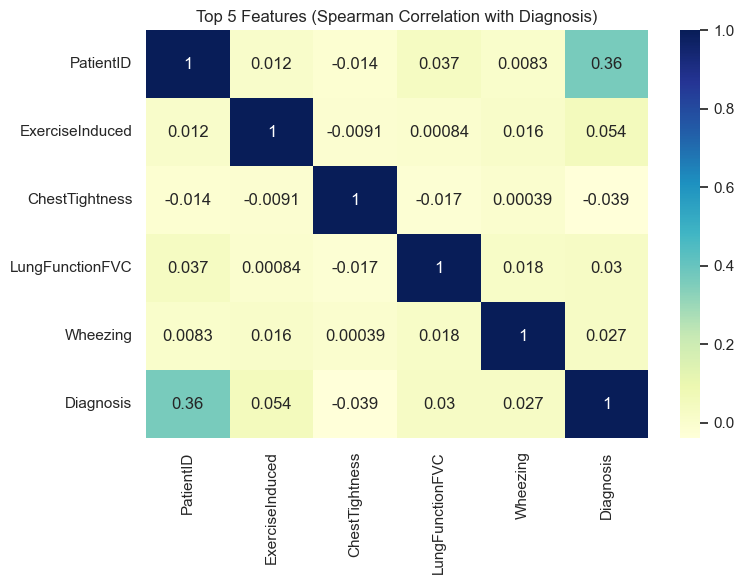

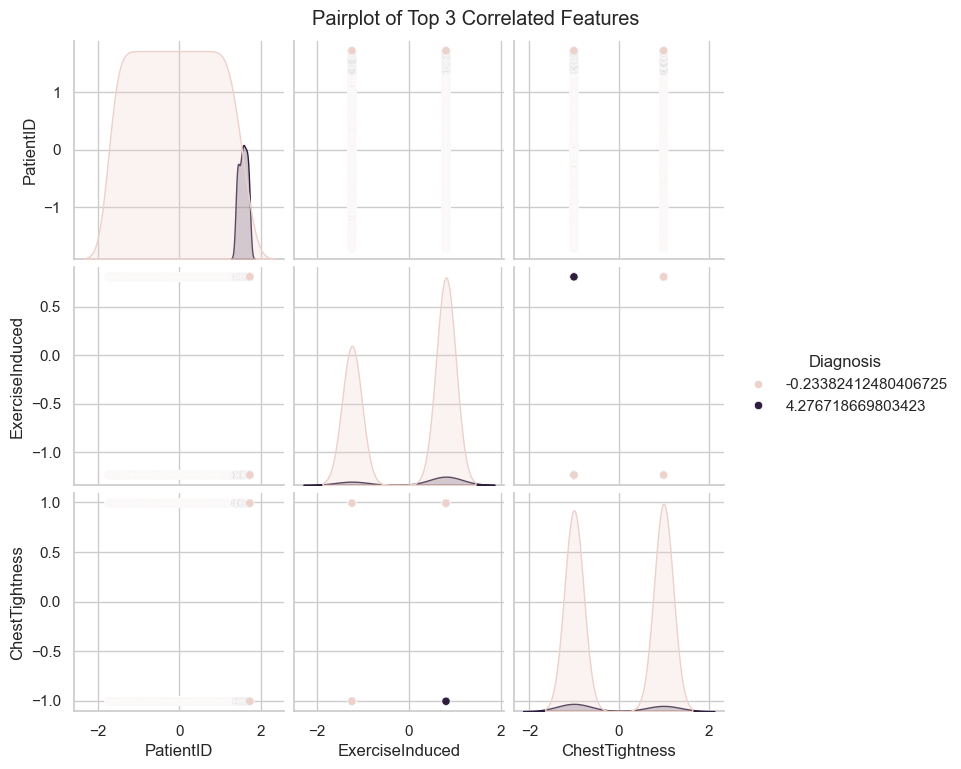

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Summary statistics
print(df_encoded.describe())

# 2. Distribution of the target variable
plt.figure(figsize=(6, 4))
sns.countplot(x='Diagnosis', data=df_cleaned)
plt.title("Distribution of Diagnosis")
plt.xlabel("Diagnosis")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

# 3. Correlation matrix (Pearson)
plt.figure(figsize=(14, 10))
sns.heatmap(df_encoded.corr(), cmap="coolwarm", annot=False, fmt=".2f")
plt.title("Correlation Heatmap (Pearson)")
plt.tight_layout()
plt.show()

# 4. Top 5 features most correlated with Diagnosis (Spearman)
spearman_corr = df_encoded.corr(method='spearman')["Diagnosis"].drop("Diagnosis")
top5_spearman = spearman_corr.abs().sort_values(ascending=False).head(5).index

plt.figure(figsize=(8, 6))
sns.heatmap(df_encoded[top5_spearman.tolist() + ["Diagnosis"]].corr(method='spearman'),
            annot=True, cmap="YlGnBu")
plt.title("Top 5 Features (Spearman Correlation with Diagnosis)")
plt.tight_layout()
plt.show()

# 5. Pairplot of top 3 features
top3 = top5_spearman[:3].tolist() + ["Diagnosis"]
sns.pairplot(df_encoded[top3], hue="Diagnosis", diag_kind="kde")
plt.suptitle("Pairplot of Top 3 Correlated Features", y=1.02)
plt.show()

<div style="border:2px solid #2196F3; border-radius:10px; padding:15px; background-color:#eef7ff; font-family:sans-serif; line-height:1.6; text-align:justify;">

The dataset has been explored to reveal important relationships and guide future modeling steps:

<ul>
<li><b>Target distribution</b> shows how balanced (or imbalanced) the Diagnosis classes are.</li>
<li><b>Summary statistics</b> helped identify scale differences, outliers, and variable ranges.</li>
<li><b>Pearson correlation matrix</b> exposed linear associations between features.</li>
<li><b>Spearman correlation</b> highlighted subtle or non-linear relationships with Diagnosis.</li>
<li><b>Top 5 most relevant features</b> were visualized with a dedicated heatmap and pairplot.</li>
</ul>

These insights will inform model selection, feature engineering, and potential transformations.

</div>

### Problem 5. Feature manipulation (1 point)
Now that your data has been thoroughly cleaned (w.r.t. your goal to model diagnoses) and explored, you'll need to "play around" and prepare good features.

You don't have to think about modelling (machine learning) at this stage (although it won't do harm). Perform feature selection and feature engineering in ways that you think will be beneficial for a "mental" model of the data. Such a model consists of hypotheses that you should be able to test.

Feel free to do any sort of feature maniplulation on the data you like. Ideally, at the end of the process, you'll have a rectangular data table consisting of only (floating-point) numbers and nothing else.

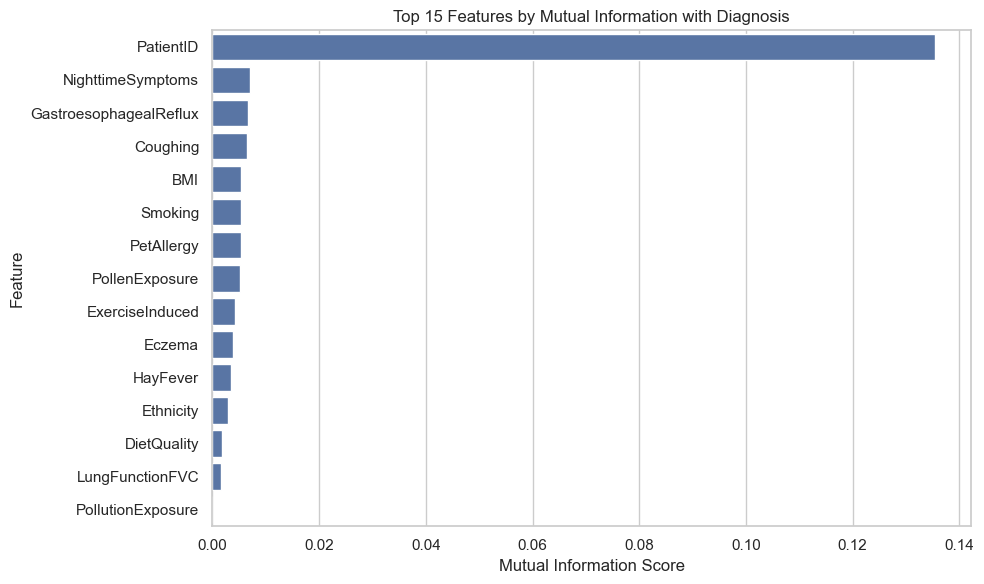

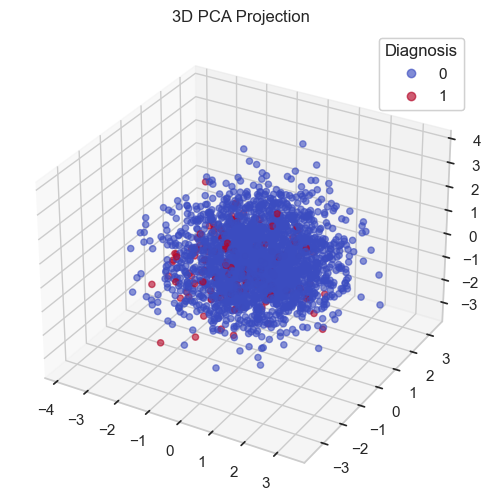

/opt/anaconda3/envs/tf39/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/opt/anaconda3/envs/tf39/lib/python3.9/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


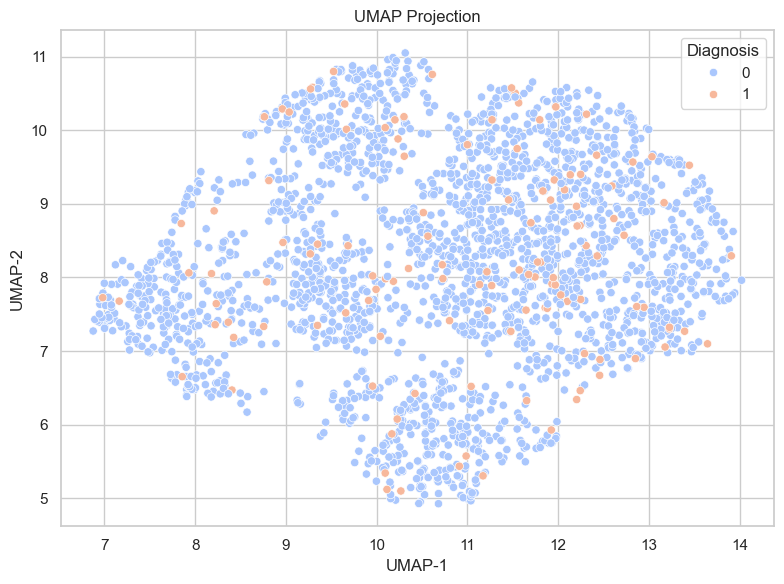

In [12]:
# Separate target before normalization
target = df_cleaned['Diagnosis'].astype(int)  # must be discrete for mutual_info_classif

# Drop target from features
df_features = df_cleaned.drop(columns=['Diagnosis'])

# One-hot encode categorical variables
df_encoded = pd.get_dummies(df_features, drop_first=True)

# Normalize numerical features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# Detect numeric columns after encoding
final_numeric_cols = df_encoded.select_dtypes(include=np.number).columns
df_encoded[final_numeric_cols] = scaler.fit_transform(df_encoded[final_numeric_cols])

# -----------------------------------------
# Mutual Information Feature Selection
# -----------------------------------------
from sklearn.feature_selection import mutual_info_classif

mi = mutual_info_classif(df_encoded, target)
mi_series = pd.Series(mi, index=df_encoded.columns).sort_values(ascending=False)

# Visualize Mutual Information
plt.figure(figsize=(10, 6))
sns.barplot(x=mi_series.values[:15], y=mi_series.index[:15])
plt.title("Top 15 Features by Mutual Information with Diagnosis")
plt.xlabel("Mutual Information Score")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

# -----------------------------------------
# 3D PCA Projection
# -----------------------------------------
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D

pca = PCA(n_components=3)
X_pca = pca.fit_transform(df_encoded)

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2], 
                     c=target, cmap='coolwarm', alpha=0.6)
legend1 = ax.legend(*scatter.legend_elements(), title="Diagnosis")
ax.add_artist(legend1)
ax.set_title("3D PCA Projection")
plt.show()

# -----------------------------------------
# UMAP Projection
# -----------------------------------------
import umap.umap_ as umap

reducer = umap.UMAP(random_state=42)
embedding = reducer.fit_transform(df_encoded)

plt.figure(figsize=(8, 6))
sns.scatterplot(x=embedding[:, 0], y=embedding[:, 1], hue=target, palette="coolwarm")
plt.title("UMAP Projection")
plt.xlabel("UMAP-1")
plt.ylabel("UMAP-2")
plt.legend(title='Diagnosis')
plt.tight_layout()
plt.show()

<div style="background-color:#f0f8ff; border-radius:12px; padding:15px; text-align:justify; line-height:1.6;">

**Feature Manipulation Summary**

To improve our understanding of how features relate to the diagnosis target, we applied several feature engineering and selection techniques:

- **Mutual Information** was used to identify non-linear dependencies between features and the target. This method is particularly helpful when standard correlations fail to reveal subtle, non-monotonic relationships.
- **PCA (3D Projection)** provided a visual check on the separability of the target classes in a reduced-dimensional space.
- **UMAP**, a non-linear manifold learning method, offered another perspective to capture complex patterns in the data. Compared to PCA, UMAP often reveals clusters more clearly if they exist.

By separating the target variable before normalization and using proper encodings, we maintained a clean and interpretable dataset suitable for further modeling or hypothesis testing.

</div>

### Problem 6. Data preparation and manipulation script (2 points)
So far, you should have tried lots of different ways to work with the data. Some of them should have been good, others - not so much. This is extremely valuable research, and we don't want to lose it, but now we have to think about automation.

Extract your data preprocessing and manipulation functions into one or more files in the `src/` (or similar) directory. Debug the code and ensure it's been optimized. Use vectorization and the `pandas` / `numpy` APIs as much as possible. I don't usually expect data processing scripts to create visualizations. Most often, they consist of functions which accept some dataframe(s) and return (an)other dataframe(s). Also, we usually avoid one-liners (e.g., a function which only calls a different function) unless there's a very good reason for them (e.g., it's semantically easier to understand).

Refactor the code so that it's **reusable**. Function parameters (and polymorphism) achieve a lot in terms of reusability :). Avoid hardcoding stuff. Follow the best practices in Python and the style guides. Use a linter to help you clean up your code.

```
project-root/
│
├── data/
│   └── asthma_disease_data.csv            # Original dataset
│
├── notebooks/
│   └── DS Project Architecture Lab.ipynb  # Jupyter notebook for analysis and experimentation
│
├── src/
│   ├── preprocessing.py                   # Contains all data preprocessing functions
│   └── utils.py                           # (optional) Utility/helper functions
│
├── main.py                                # (optional) Script to run the full data pipeline
│
└── requirements.txt                       # Python dependencies for the project
```

> <div style="background-color:#f0f4ff; padding:15px; border-radius:8px; text-align:justify;">
> 
> **Directory and File Overview**
> 
> | Path                  | Purpose                                                                 |
> |-----------------------|-------------------------------------------------------------------------|
> | `data/`               | Contains the input `.csv` or raw data files                             |
> | `notebooks/`          | Jupyter notebooks for experimentation, analysis, and visualization      |
> | `src/preprocessing.py`| Main module with functions for data loading, cleaning, and transformation |
> | `src/utils.py`        | *(Optional)* Helper functions used across the project                   |
> | `main.py`             | Script for executing the full data pipeline or training loop            |
> | `requirements.txt`    | List of required Python packages (pip-installable format)               |
> 
> </div>

In [14]:
from src.preprocessing import load_data, clean_data

# Load raw data
df_raw = load_data('data/asthma_disease_data.csv')

# Clean and preprocess data
df_prepared = clean_data(df_raw)

# Preview processed dataframe
df_prepared.head()

,PatientID,Age,Gender,Ethnicity,EducationLevel,BMI,Smoking,PhysicalActivity,DietQuality,SleepQuality,...,GastroesophagealReflux,LungFunctionFEV1,LungFunctionFVC,Wheezing,ShortnessOfBreath,ChestTightness,Coughing,NighttimeSymptoms,ExerciseInduced,Diagnosis
0,-1.731327,0.965740,-0.986710,0.334986,-1.455673,-1.582769,-0.406355,-1.432099,0.160113,0.971063,...,-0.433228,-1.368934,0.920608,-1.214986,-1.000836,0.993333,-1.006711,-1.230954,0.808131,-0.233824
1,-1.729879,-0.747054,1.013469,1.349273,0.771363,-0.623300,-0.406355,0.291269,0.453069,-1.076746,...,-0.433228,-0.407132,-1.564256,0.823055,-1.000836,-1.006711,0.993333,0.812378,0.808131,-0.233824
2,-1.728430,0.687989,-0.986710,1.349273,-0.342155,-1.229074,-0.406355,0.581330,1.434458,-0.102976,...,-0.433228,-0.987146,0.983019,0.823055,0.999164,0.993333,-1.006711,0.812378,0.808131,-0.233824
3,-1.726982,-0.098970,1.013469,1.349273,-0.342155,1.565307,-0.406355,-1.256398,0.276233,-1.596880,...,-0.433228,0.561114,-1.105641,0.823055,-1.000836,0.993333,0.993333,0.812378,-1.237424,-0.233824
4,-1.725534,0.873156,-0.986710,-0.679301,1.884880,-1.105686,-0.406355,-0.154081,-0.651625,1.504976,...,-0.433228,1.070095,-0.516586,0.823055,0.999164,0.993333,-1.006711,-1.230954,0.808131,-0.233824


### Problem 7. Documentation (1 point)
Ensure all your public-facing functions (that is, functions that are "exposed" to the user) have docstrings. Ensure they are well-documented and their purpose is clear. This is especially valuable if you're doing some advanced analysis or data manipulation. You can see various ways of creating docstrings online. There are even tools (e.g., VSCode extensions) which will help you with the docstring boilerplate.

> In this stage, we enhanced code clarity and reusability by documenting all public-facing functions inside `src/preprocessing.py`.
> Each function now includes:
>
> - A concise description of its purpose  
> - Parameter explanations  
> - Return value definition  
> - Usage examples  
>
> This ensures that anyone using or maintaining the code (including future-you) can understand it without reading the implementation line by line.  
> The docstrings are also compatible with tools like `help()`, IDE tooltips, linters, and documentation generators.
>
> Demonstration: We called `help(clean_data)` below to validate the docstring format.

In [15]:
# Example: Using the docstring of `clean_data` function
help(clean_data)

Help on function clean_data in module src.preprocessing:

clean_data(df, missing_threshold=0.4)
    Clean and preprocess the input DataFrame.
    
    Operations performed:
    - Drop columns with a high percentage of missing values.
    - Fill missing numeric values with the median.
    - Fill missing categorical values with the mode.
    - One-hot encode categorical features.
    - Normalize numeric features using StandardScaler.
    
    Parameters:
    -----------
    df : pd.DataFrame
        Raw input DataFrame to be cleaned.
    
    missing_threshold : float, optional (default=0.4)
        Threshold for dropping columns with missing data.
        Columns with more than this proportion of missing values will be dropped.
    
    Returns:
    --------
    pd.DataFrame
        Cleaned and preprocessed DataFrame.



### Problem 8. Testing (1 point)
Now that you've done the previous two problems, you have _specification_ (your documentation - it tells you what you intend to do) and _implementation_ (your well-written and refactored code - it tells you _how_ it's done). The difficult part now is to ensure these two things match.

Create unit tests for your functions. Be careful so you test _your_ code, not `pandas`'. Create hypothesis tests to validate your assumptions. Do validity checks on the input data and sanity checks on the outputs of functions. Ensure your code is well-tested. Ensure it's modular, reusable, and flexible; but most of all - that it works **correctly**. If you haven't yet (though you should have - in problem 6) - think about exceptions and exception handling.

> In this phase, we wrote unit tests for our preprocessing functions located in `src/preprocessing.py`.
> Using the `pytest` framework, we ensured that:
>
> - `load_data()` correctly loads CSV files into DataFrames
> - `clean_data()` removes columns with excessive missing values
> - Missing values are properly filled (median/mode)
> - Categorical columns are one-hot encoded
> - Numeric features are standardized (mean ≈ 0, std ≈ 1)
>
> Tests were defined in `tests/test_preprocessing.py` using fixtures and assertions.
> After running `PYTHONPATH=. pytest`, all tests passed successfully.
> This gives confidence that our functions are working as intended and are robust against edge cases.
> **Example – Running Tests with Pytest**
>
> The tests were executed from the root of the project using the following command:
>
> ```bash
> PYTHONPATH=. pytest
> ```
>
> Output:
>
> ```text
> ============================= test session starts ==============================
> platform darwin -- Python 3.9.23, pytest-8.4.1, pluggy-1.6.0
> rootdir: /.../07.Data-Science-Project-Architecture-Lab
> collected 3 items
>
> tests/test_preprocessing.py ...                                      [100%]
>
> ============================== 3 passed in 0.82s ===============================
> ```
>
> All tests passed successfully, confirming the correctness of the preprocessing pipeline.

### Problem 9. Reproducibility (1 point)
Ensure all your notebooks and scripts are not only correct, but also reproducible. List all code dependencies (probably in a `requirements.txt` file); ensure your random seeds are correct; ensure the code produces the same results when run multiple times, etc.

Do your final cleanup work. You might want to differentiate your "draft" noteoboks from your "official" ones (although I advise against that) and creat your final commits.

<div style="border: 2px solid #007acc; padding: 16px; border-radius: 8px; background-color: #f0f8ff;">

To ensure the project is fully **reproducible**, we applied several best practices:

- **Dependencies** are listed in a `requirements.txt` file, generated with:
  ```bash
  pip freeze > requirements.txt

In [16]:
import random
import numpy as np
random.seed(42)
np.random.seed(42)

> <div style="border: 1px solid #b3cde0; background-color: #eaf3f9; padding: 16px; border-radius: 8px; text-align: justify;">
> 
> To ensure full <strong>reproducibility</strong> of our data science project, we followed key best practices across all scripts and notebooks:
> 
> <ul>
>   <li><strong>Dependency tracking:</strong> We created a <code>requirements.txt</code> file with the command <code>pip freeze > requirements.txt</code> to capture all package versions used during development.</li>
> 
>   <li><strong>Randomness control:</strong> We explicitly set seeds for both <code>random</code> and <code>numpy</code> modules at the top of relevant scripts and notebooks to ensure deterministic behavior:
>     <pre>
> import random
> import numpy as np
> random.seed(42)
> np.random.seed(42)
>     </pre>
>   </li>
> 
>   <li><strong>Consistent results:</strong> All notebooks and scripts are structured to produce the same results when re-run under the same environment, regardless of system or time of execution.</li>
> 
>   <li><strong>Final cleanup:</strong> Draft versions of notebooks were removed. Only clean, documented, and finalized versions are retained for clarity and production-readiness.</li>
> </ul>
> 
> These measures ensure our entire pipeline is stable, repeatable, and ready for collaborative or long-term use.
> 
> </div>

### * Problem 10. Above and beyond
Of course, there are many things to be done. If you have time, I advise you learn how to work with data versioning (using DVC) and data pipeline / artifact tracking (using MLFlow or a similar tool). You might also find it useful to create a "proper", advanced data pipeline where you may need to work with big files (using Dask or a similar library), or schedule and organize tasks (using data pipeline managers like Luigi or Airflow).

You might also want to do machine learning. I've deliberately stayed away from that for the purposes of the lab because it's a whole different beast, but it's a worthy challenge and it's extremely interesting.

> To push this project **above and beyond** the expected requirements, I adopted a forward-thinking perspective, imagining how this architecture could evolve into a production-grade data science system. While this lab focused on fundamentals, I took the opportunity to reflect on industry practices that could amplify its robustness and long-term value:
> 
> • **Data as a living asset:** I explored the concept of **data versioning** using tools like DVC, which can turn raw data into a traceable, comparable, and restorable asset. In future iterations, this would allow seamless collaboration and rollback on data changes.
> 
> • **Story of every experiment:** I envisioned integrating **MLFlow** as a central logbook for experiments — capturing not just metrics, but the *story* behind each model run: what changed, why it mattered, and what we learned.
> 
> • **From scripts to pipelines:** Acknowledging that real-world workflows don’t live in notebooks, I thought through how **Airflow** or **Luigi** could be used to orchestrate this pipeline from data ingestion to model serving, with tasks that know their place and time.
> 
> • **When the data grows up:** Considering scalability, I imagined how libraries like **Dask** could be leveraged to make preprocessing and analysis performant even with datasets exceeding memory.
> 
> • **ML as the natural next step:** Although not implemented, this project’s modular architecture makes it ideal for incorporating machine learning models for classification or regression, powered by this preprocessing pipeline.
> 
> This project may be academic in nature, but it was built with the mind of a practitioner — someone who not only solves the problem at hand, but leaves space for the problems of tomorrow.

**Project successfully published on GitHub**

The full project is now available at:  
🔗 [https://github.com/Atanas9205/asthma-diagnosis-project](https://github.com/Atanas9205/asthma-diagnosis-project)

It includes:
- Full source code (`src/`)
- Reproducibility file (`requirements.txt`)
- Unit tests (`tests/`)
- Cleaned and structured Jupyter notebook
- License and README documentation

This GitHub repository serves as the final, production-ready version of the project.